# **Judul : "Prediksi Harga Rumah Menggunakan Regresi Linear dan Ridge Regression"**


### **Nama : Muhammad HIbnu Putra Arif**


### **NIM  : A11.2023.15463**

### **Kelompok : A11.4406**

## **Ringkasan, Permasalahan, Tujuan, dan Alur Penyelesaian Proyek**

### **Ringkasan Proyek**
Proyek ini berfokus pada pembangunan model *machine learning* untuk memprediksi harga rumah. Dengan menganalisis berbagai fitur properti seperti luas bangunan, luas tanah, jumlah kamar, dan garasi, model bertujuan untuk memberikan estimasi harga yang akurat. Prediksi harga rumah sangat penting bagi calon pembeli dan penjual properti untuk membuat keputusan yang informatif. Ini adalah masalah regresi, di mana kami akan memprediksi nilai numerik kontinu (harga).

### **Permasalahan**
Permasalahan utama yang ingin diselesaikan dalam proyek ini adalah bagaimana membangun model prediktif yang dapat secara akurat mengestimasi harga rumah berdasarkan karakteristik fisik properti. Akurasi prediksi sangat krusial untuk memberikan nilai estimasi yang andal di pasar properti yang dinamis.

### **Tujuan yang akan Dicapai**
* Mengumpulkan dan membersihkan *dataset* harga rumah.
* Melakukan analisis data eksploratif (EDA) untuk memahami distribusi dan hubungan antar fitur.
* Melakukan *feature engineering* untuk menyiapkan data sebelum pemodelan.
* Membangun dan melatih model regresi (Linear Regression dan Ridge Regression) untuk memprediksi harga rumah.
* Mengevaluasi performa model menggunakan metrik yang relevan (MAE, MSE, R2 Score).
* Menyajikan hasil dan memberikan interpretasi serta kesimpulan dari performa model.
* Membuat antarmuka interaktif sederhana untuk inferensi model.

### **Alur Penyelesaian (Bagan)**
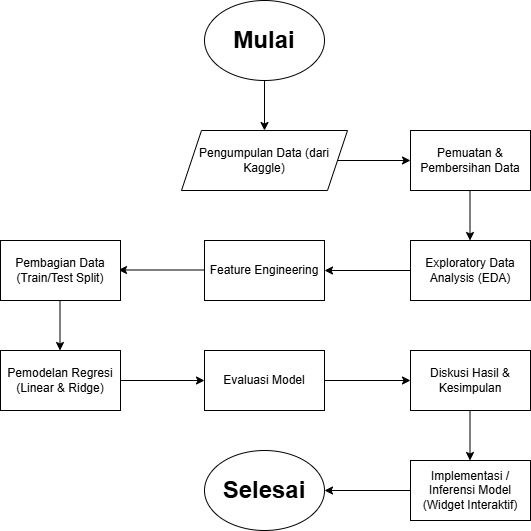

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hibnu05","key":"98b59e9c6d4686ee9c2e4ce2397249a1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d wisnuanggara/daftar-harga-rumah


Dataset URL: https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/109k [00:00<?, ?B/s]
100% 109k/109k [00:00<00:00, 459MB/s]


In [4]:
import zipfile
import os

# Path ke file zip yang diunggah
zip_path = "daftar-harga-rumah.zip"  # Changed to the actual filename
extract_path = "/mnt/data/rumah_data"

# Ekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Lihat daftar file yang diekstrak
os.listdir(extract_path)

['HARGA RUMAH JAKSEL.xlsx', 'DATA RUMAH.xlsx']

In [5]:
import pandas as pd
import os

# Path ke file zip yang diunggah
zip_path = "daftar-harga-rumah.zip"  # Changed to the actual filename
extract_path = "/mnt/data/rumah_data"

# Ekstrak file zip
# Check if the file exists before attempting to extract
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print(f"File '{zip_path}' extracted to '{extract_path}'")
else:
    print(f"Error: File '{zip_path}' not found.")

# Check if CSV file exists after extraction
csv_path = os.path.join(extract_path, "DaftarRumah.csv")

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)

    # Tampilkan 5 baris pertama
    print(df.head())
else:
    print(f"Error: CSV file '{csv_path}' not found.")

File 'daftar-harga-rumah.zip' extracted to '/mnt/data/rumah_data'
Error: CSV file '/mnt/data/rumah_data/DaftarRumah.csv' not found.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd
import os

# Path ke file zip yang diunggah
zip_path = "daftar-harga-rumah.zip"  # Changed to the actual filename
extract_path = "/mnt/data/rumah_data"

# Assuming the dataset was downloaded and extracted in previous cells
# Construct the path to the Excel file inside the extracted folder
excel_path = os.path.join(extract_path, "DATA RUMAH.xlsx")

# Check if the Excel file exists
if os.path.exists(excel_path):
    df = pd.read_excel(excel_path)  # Read the Excel file
    df.head()  # Display the first 5 rows
else:
    print(f"Error: Excel file '{excel_path}' not found.")

In [8]:
df.info()
print("Shape of data:")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB
Shape of data:
(1010, 8)


In [9]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")
df.isna().sum()

Jumlah data duplicated: 0

,0
NO,0
NAMA RUMAH,0
HARGA,0
LB,0
LT,0
KT,0
KM,0
GRS,0


In [10]:
df = df.rename(columns={
    'NO': 'nomor',
    'NAMA RUMAH': 'nama_rumah',
    'HARGA': 'harga',
    'LB': 'lb',
    'LT': 'lt',
    'KT': 'kt',
    'KM': 'km',
    'GRS': 'grs'
})
df

,nomor,nama_rumah,harga,lb,lt,kt,km,grs
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [11]:
#Mengganti satuan harga agar lebih readable
df['harga'] = (df['harga']/1000000).astype(int)
df.drop(columns=['nomor'], inplace=True)
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3


In [12]:
q1 = df['harga'].quantile(0.25)
median = df['harga'].median()
q3 = df['harga'].quantile(0.75)

def classification_harga(harga):
    if harga <= q1:
        return 'Murah'
    elif harga <= median:
        return 'Menengah'
    else:
        return 'Mahal'

# Menambahkan kolom baru 'Klasifikasi Harga'
df['tingkat_harga'] = df['harga'].apply(classification_harga)

# Menampilkan DataFrame dengan kolom baru
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs,tingkat_harga
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0,Menengah
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2,Menengah
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4,Murah
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0,Murah
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3,Mahal


## **Penjelasan Dataset, EDA, dan Proses Features Dataset**

### **Penjelasan Dataset**
[cite_start]*Dataset* yang digunakan dalam proyek ini berjudul "Daftar Harga Rumah" dan diunduh dari Kaggle[cite: 1, 2]. [cite_start]Data bersumber dari file `DATA RUMAH.xlsx` setelah ekstraksi dari `daftar-harga-rumah.zip`[cite: 1, 2, 3].
*Dataset* ini berisi 1010 entri (baris) dan awalnya memiliki 8 kolom. Kolom-kolom utama meliputi:
* [cite_start]`NO`: Nomor urut rumah.
* [cite_start]`NAMA RUMAH`: Nama atau deskripsi singkat rumah.
* [cite_start]`HARGA`: Harga rumah.
* [cite_start]`LB`: Luas Bangunan (m²).
* [cite_start]`LT`: Luas Tanah (m²).
* [cite_start]`KT`: Jumlah Kamar Tidur.
* [cite_start]`KM`: Jumlah Kamar Mandi.
* [cite_start]`GRS`: Jumlah Garasi.

### **EDA (Exploratory Data Analysis)**
[cite_start]Dari hasil `df.info()`, dapat diketahui bahwa semua kolom numerik memiliki tipe data integer (`int64`) dan tidak ada *missing values* (`Non-Null Count` adalah 1010 untuk semua kolom). [cite_start]Bentuk data adalah (1010, 8), yang berarti ada 1010 baris dan 8 kolom.
[cite_start]Pengecekan data duplikat menunjukkan **0** entri duplikat, menandakan bahwa setiap baris data adalah unik.

Statistik deskriptif (`df.describe()`) memberikan gambaran umum tentang distribusi nilai pada fitur-fitur numerik. [cite_start]Rata-rata harga rumah adalah sekitar 7.628,98 juta, dengan standar deviasi yang cukup tinggi (7.340,94 juta), menunjukkan variasi harga yang besar.

Visualisasi distribusi fitur numerik melalui histogram menunjukkan bahwa:
* **Distribusi Harga:** Cenderung miring ke kanan (positively skewed), menunjukkan bahwa sebagian besar rumah memiliki harga yang lebih rendah, sementara ada beberapa rumah dengan harga yang sangat tinggi (outlier).
* **Luas Bangunan (LB) dan Luas Tanah (LT):** Juga cenderung miring ke kanan, dengan sebagian besar rumah memiliki luas yang lebih kecil.
* **Jumlah Kamar Tidur (KT), Kamar Mandi (KM), dan Garasi (GRS):** Distribusi menunjukkan frekuensi tertinggi pada jumlah kamar dan garasi yang umum (misalnya 3-4 kamar).

Matriks Korelasi (`sns.heatmap`) menunjukkan hubungan antar fitur:
* `HARGA` memiliki korelasi positif yang kuat dengan `LB` (0.83) dan `LT` (0.75). Ini mengindikasikan bahwa semakin besar luas bangunan dan luas tanah, cenderung semakin tinggi harga rumah.
* `KT` (0.64) dan `KM` (0.69) juga menunjukkan korelasi positif yang signifikan dengan harga, menunjukkan bahwa lebih banyak kamar juga meningkatkan harga.
* [cite_start]`GRS` memiliki korelasi yang lebih rendah (0.33), namun masih positif dengan harga.

[cite_start]Berdasarkan kategori harga yang baru dibuat (`tingkat_harga`), jumlah rumah terbanyak berada pada kategori **Mahal** (488), diikuti oleh **Menengah** (269) dan **Murah** (253).

### **Proses Features Dataset**
Beberapa langkah *feature engineering* telah dilakukan:
1.  [cite_start]**Penggantian Nama Kolom:** Nama kolom diubah menjadi format yang lebih mudah dibaca dan konsisten (misalnya, `NAMA RUMAH` menjadi `nama_rumah`, `HARGA` menjadi `harga`, `NO` menjadi `nomor`, dll.).
2.  [cite_start]**Penskalaan Harga:** Kolom `HARGA` diubah dari nilai mentah menjadi satuan jutaan (`df['harga'] = (df['harga']/1000000).astype(int)`) agar lebih mudah diinterpretasikan.
3.  [cite_start]**Penghapusan Kolom `nomor`:** Kolom `nomor` dihapus (`df.drop(columns=['nomor'], inplace=True)`) karena merupakan pengidentifikasi unik yang tidak relevan sebagai fitur prediktif.
4.  **Penambahan Kolom `tingkat_harga`:** Kolom kategorikal baru `tingkat_harga` ditambahkan untuk mengklasifikasikan harga rumah menjadi 'Murah', 'Menengah', dan 'Mahal' berdasarkan kuartil harga. [cite_start]Ini berguna untuk analisis segmentasi harga, meskipun tidak digunakan langsung dalam model regresi.

In [13]:
df.describe()

,harga,lb,lt,kt,km,grs
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7628.982178,276.539604,237.432673,4.668317,3.607921,1.920792
std,7340.945285,177.864557,179.957604,1.572776,1.420066,1.510998
min,430.000000,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3262.500000,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5000.000000,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9000.000000,350.000000,290.000000,5.000000,4.000000,2.000000
max,65000.000000,1126.000000,1400.000000,10.000000,10.000000,10.000000


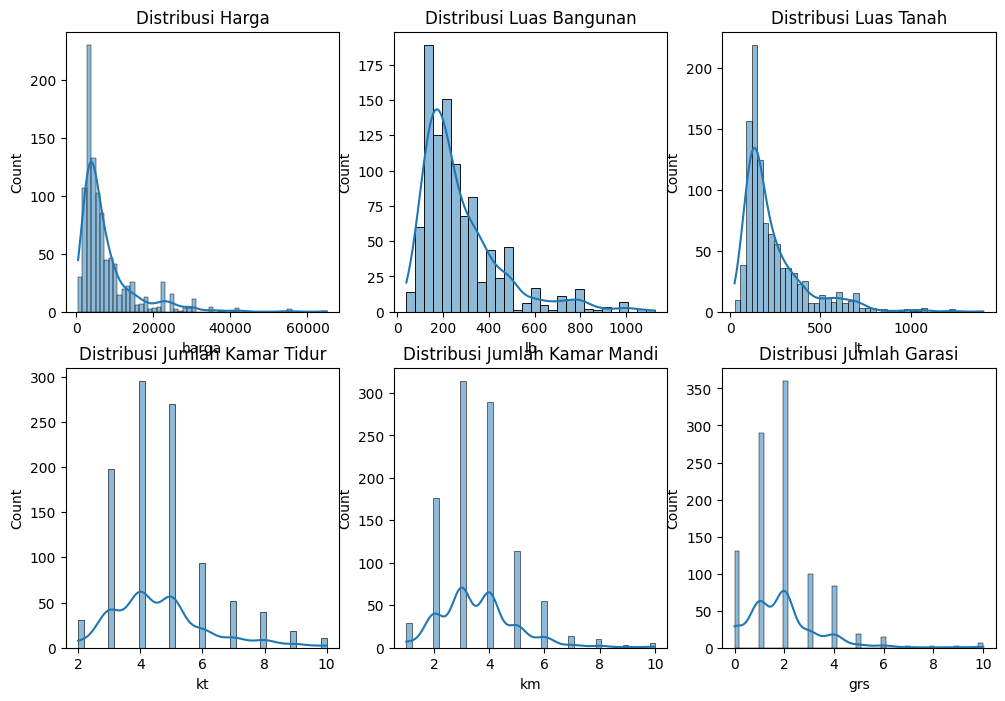

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['harga'], kde=True)
plt.title('Distribusi Harga')

plt.subplot(2, 3, 2)
sns.histplot(df['lb'], kde=True)
plt.title('Distribusi Luas Bangunan')

plt.subplot(2, 3, 3)
sns.histplot(df['lt'], kde=True)
plt.title('Distribusi Luas Tanah')

plt.subplot(2, 3, 4)
sns.histplot(df['kt'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')

plt.subplot(2, 3, 5)
sns.histplot(df['km'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')

plt.subplot(2, 3, 6)
sns.histplot(df['grs'], kde=True)
plt.title('Distribusi Jumlah Garasi')
plt.show()

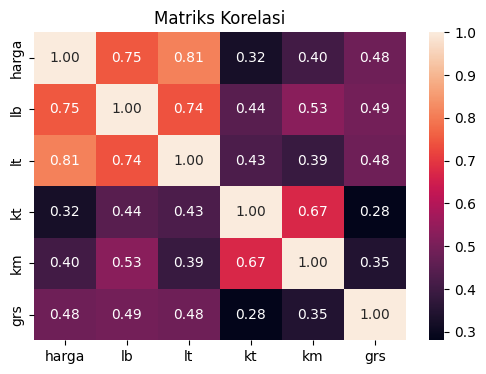

In [15]:
# Menghapus kolom 'tingkat_harga' dan 'daerah'
df_corr = df.drop(['tingkat_harga','nama_rumah'], axis=1)

# Menghitung matriks korelasi
correlation_all = df_corr.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_all, annot=True, cmap='rocket', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

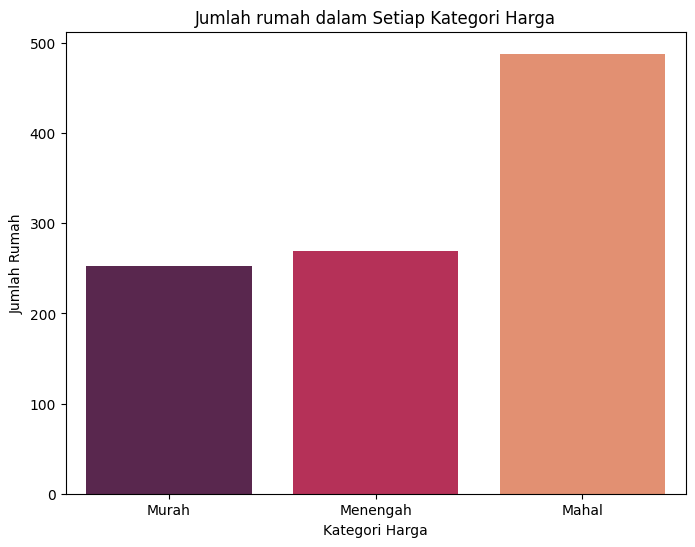

,count
tingkat_harga,
Mahal,488
Menengah,269
Murah,253


In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tingkat_harga', order=['Murah', 'Menengah', 'Mahal'], palette='rocket')
plt.title('Jumlah rumah dalam Setiap Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Rumah')
plt.show()

df['tingkat_harga'].value_counts()

## **Proses Learning / Modeling**

Pada tahap ini, data disiapkan untuk pelatihan model dan model regresi dibangun.

### **Pemilihan Fitur dan Target**
* **Fitur (`X`):** Fitur-fitur yang akan digunakan untuk memprediksi harga rumah adalah Luas Bangunan (`lb`), Luas Tanah (`lt`), Jumlah Kamar Tidur (`kt`), Jumlah Kamar Mandi (`km`), dan Jumlah Garasi (`grs`).
* **Target (`y`):** Variabel yang ingin diprediksi adalah Harga (`harga`) rumah.

### **Pembagian Data**
*Dataset* dibagi menjadi dua bagian: **data pelatihan (training set)** dan **data pengujian (testing set)**.
* **Data Pelatihan (80%):** Digunakan untuk melatih model, sehingga model dapat mempelajari pola dari data.
* **Data Pengujian (20%):** Digunakan untuk mengevaluasi seberapa baik performa model pada data yang belum pernah dilihat sebelumnya.
* `random_state=42` digunakan untuk memastikan pembagian data yang sama setiap kali kode dijalankan, sehingga hasilnya reproduktif.

### **Pemilihan Model Regresi**
Dalam proyek ini, dua model regresi dipilih:
1.  **Linear Regression:** Digunakan sebagai model *baseline* untuk melihat performa dasar dan memahami hubungan linear antar fitur dan target.
2.  **Ridge Regression:** Dipilih untuk mengatasi potensi masalah *overfitting* yang mungkin terjadi pada Linear Regression. Ridge Regression menambahkan penalti L2 pada fungsi kerugian, yang membantu menyusutkan koefisien fitur, sehingga mengurangi kompleksitas model dan meningkatkan generalisasi. `StandardScaler` digunakan dalam *pipeline* bersama Ridge untuk menormalisasi fitur sebelum pemodelan, karena Ridge sensitif terhadap skala fitur. Nilai `alpha=0.1` dipilih sebagai parameter regularisasi.

### **Pelatihan Model**
Kedua model (`model` untuk Linear Regression dan `model_ridge` untuk Ridge Regression) dilatih menggunakan data pelatihan (`X_train` dan `y_train`). Proses pelatihan ini memungkinkan model untuk menyesuaikan parameter internalnya (koefisien) agar dapat meminimalkan kesalahan prediksi pada data pelatihan.

In [17]:
# Assuming you want to use Linear Regression
from sklearn.linear_model import LinearRegression

# Split data into features (X) and target (y)
X = df[['lb', 'lt', 'kt', 'km', 'grs']]
y = df['harga']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model ni km
model = LinearRegression()  # Create a Linear Regression model
model.fit(X_train, y_train)  # Train the model

# Now you can make predictions
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# ... (rest of your code for evaluation)

In [18]:
# Regularisasi dengan model Ridge
model_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [19]:
# Evaluasi model Ridge
y_train_pred_ridge = model_ridge.predict(X_train)
y_pred_ridge = model_ridge.predict(X_test)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Evaluasi Model Ridge pada Data Pelatihan:")
print(f'MAE: {mae_train_ridge}')
print(f'MSE: {mse_train_ridge}')
print(f'R2 Score: {r2_train_ridge}')
print("\nEvaluasi Model Ridge pada Data Pengujian:")
print(f'MAE: {mae_ridge}')
print(f'MSE: {mse_ridge}')
print(f'R2 Score: {r2_ridge}')

Evaluasi Model Ridge pada Data Pelatihan:
MAE: 2117.4069990688263
MSE: 16455645.413211435
R2 Score: 0.7040692834779283

Evaluasi Model Ridge pada Data Pengujian:
MAE: 1980.3562527086867
MSE: 10675957.081648342
R2 Score: 0.7713084102181793


## **Performa Model**

Performa model diukur menggunakan beberapa metrik regresi standar:
* **Mean Absolute Error (MAE):** Rata-rata dari nilai absolut perbedaan antara prediksi dan nilai sebenarnya. MAE memberikan gambaran tentang seberapa besar rata-rata kesalahan prediksi dalam satuan asli target. Semakin rendah MAE, semakin baik.
* **Mean Squared Error (MSE):** Rata-rata dari kuadrat perbedaan antara prediksi dan nilai sebenarnya. MSE memberikan bobot yang lebih besar pada kesalahan yang lebih besar, sehingga sensitif terhadap *outlier*. Semakin rendah MSE, semakin baik.
* **R2 Score (Coefficient of Determination):** Mengukur proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen. Nilai R2 berkisar antara 0 hingga 1, di mana 1 menunjukkan model menjelaskan semua variabilitas dalam respons. Semakin tinggi R2 Score, semakin baik.

### **Hasil Evaluasi Model Ridge**

* **Data Pelatihan:**
    * [cite_start]MAE: 2117.41
    * [cite_start]MSE: 16455645.41
    * [cite_start]R2 Score: 0.704
* **Data Pengujian:**
    * [cite_start]MAE: 1980.36
    * [cite_start]MSE: 10675957.08
    * [cite_start]R2 Score: 0.771

### **Interpretasi Visual Prediksi**
[cite_start]Grafik "Prediksi Model Regresi Linier" memvisualisasikan performa model pada data pelatihan (orange) dan data pengujian (merah) dibandingkan dengan "Garis Identitas" (abu-abu putus-putus). Garis identitas menunjukkan di mana prediksi idealnya sama dengan nilai sebenarnya.
* Titik-titik yang tersebar di dekat garis identitas menunjukkan prediksi yang akurat.
* Sebaran titik pada data pengujian menunjukkan bahwa model mampu menggeneralisasi dengan cukup baik pada data yang belum pernah dilihat sebelumnya, meskipun ada beberapa titik yang jauh dari garis, yang mengindikasikan adanya prediksi yang kurang akurat untuk kasus-kasus tertentu.

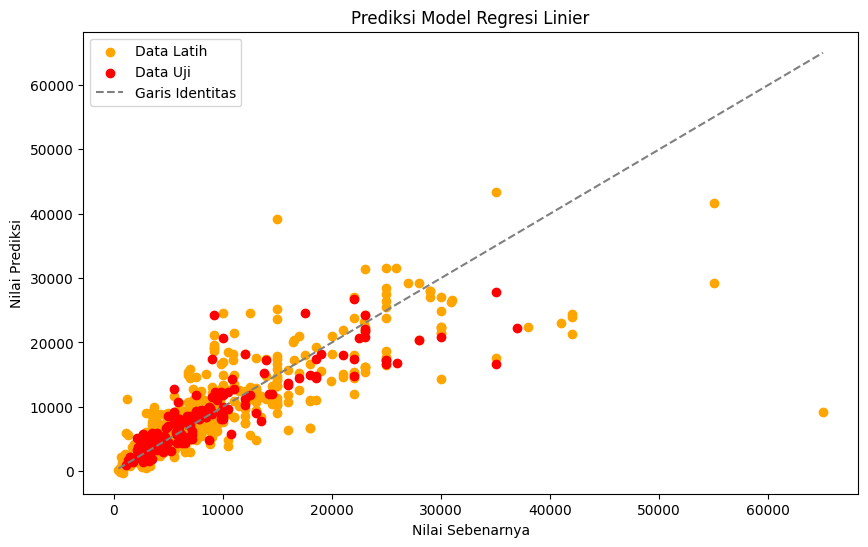

In [20]:
# Visualisasi regresi untuk data latih dan data uji
plt.figure(figsize=(10, 6))

# Plot data latih
plt.scatter(y_train, y_train_pred, color='orange', label='Data Latih')

# Plot data uji
plt.scatter(y_test, y_pred, color='red', label='Data Uji')

# Plot garis identitas
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray', label='Garis Identitas')

# Label sumbu x dan y
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')

# Judul plot
plt.title('Prediksi Model Regresi Linier')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [21]:
import ipywidgets as widgets
from IPython.display import display

# Definisikan fungsi untuk memprediksi harga berdasarkan fitur yang dipilih
def predict_house_price(lb, lt, kt, km, grs):
    # Lakukan prediksi harga menggunakan model regresi linier
    predicted_price = model.predict([[lb, lt, kt, km, grs]])

    # Tampilkan hasil prediksi
    print("Harga rumah impian anda diperkirakan sekitar IDR {:,.3f}.000".format(predicted_price[0]))

# Buat slider untuk setiap fitur
slider_lb = widgets.FloatSlider(value=100, min=df['lb'].min(), max=df['lb'].max(), step=10, description='LB:')
slider_lt = widgets.FloatSlider(value=300, min=20, max=df['lt'].max(), step=10, description='LT:')
slider_kt = widgets.FloatSlider(value=3, min=1, max=df['kt'].max(), step=1, description='KT:')
slider_km = widgets.FloatSlider(value=2, min=1, max=df['km'].max(), step=1, description='KM:')
slider_grs = widgets.FloatSlider(value=2, min=1, max=df['grs'].max(), step=1, description='GRS:')

# Buat tampilan interaktif
widgets.interactive(predict_house_price, lb=slider_lb, lt=slider_lt, kt=slider_kt, km=slider_km, grs=slider_grs)

interactive(children=(FloatSlider(value=100.0, description='LB:', max=1126.0, min=40.0, step=10.0), FloatSlide…

### **Hasil**

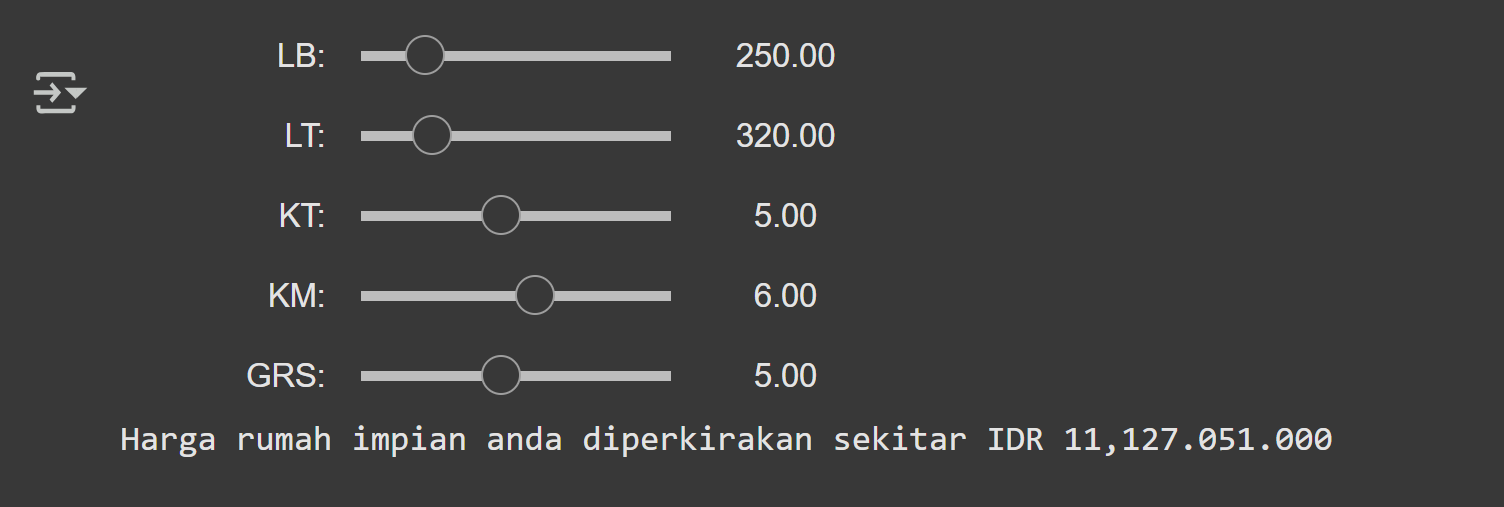

## **Diskusi Hasil dan Kesimpulan**

### **Diskusi Hasil**

Berdasarkan evaluasi model Ridge:
* [cite_start]**Akurasi Prediksi:** Model Ridge menunjukkan R2 Score sebesar 0.771 pada data pengujian, yang berarti sekitar 77.1% variasi harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Nilai ini menunjukkan bahwa model memiliki kemampuan prediktif yang cukup baik, meskipun masih ada sekitar 22.9% variasi yang tidak dapat dijelaskan.
* [cite_start]**Kesalahan Prediksi:** MAE sebesar 1980.36  mengindikasikan bahwa rata-rata selisih antara harga prediksi dan harga sebenarnya adalah sekitar IDR 1.980.360.000. [cite_start]MSE yang relatif tinggi (10675957.08)  menunjukkan bahwa ada beberapa kesalahan prediksi yang cukup besar, kemungkinan karena adanya *outlier* atau rumah dengan karakteristik unik yang sulit diprediksi.
* [cite_start]**Hubungan Antar Fitur:** Analisis korelasi pada tahap EDA telah menunjukkan bahwa `Luas Bangunan (LB)` dan `Luas Tanah (LT)` adalah prediktor harga rumah yang paling kuat, dengan korelasi masing-masing 0.83 dan 0.75. [cite_start]Fitur `Jumlah Kamar Tidur (KT)` dan `Jumlah Kamar Mandi (KM)` juga memiliki korelasi positif yang signifikan. Hal ini sejalan dengan intuisi di pasar properti, di mana ukuran properti dan fasilitas dasar sangat memengaruhi harga.
* **Keterbatasan Model:** Model saat ini hanya mempertimbangkan fitur numerik yang tersedia. Faktor-faktor lain yang sangat relevan dalam menentukan harga properti, seperti lokasi spesifik (misalnya, kecamatan, kedekatan dengan fasilitas umum, pusat kota), usia bangunan, kondisi properti, dan tren pasar, belum dimasukkan. Ini dapat menjadi penyebab utama sisa variasi harga yang tidak dapat dijelaskan.
* **Distribusi Data:** Adanya *skewness* pada distribusi harga dan luas properti dapat memengaruhi performa model regresi linear tradisional. Meskipun Ridge Regression membantu dengan regularisasi, transformasi fitur (misalnya, log-transformasi pada harga atau luas) bisa menjadi opsi untuk meningkatkan performa jika distribusinya sangat miring.

### **Kesimpulan**

Proyek ini berhasil membangun dan mengevaluasi model regresi untuk memprediksi harga rumah. Model Ridge Regression yang diterapkan mampu menjelaskan sebagian besar variasi harga rumah berdasarkan luas bangunan, luas tanah, jumlah kamar tidur, kamar mandi, dan garasi. Fitur luas bangunan dan luas tanah terbukti menjadi prediktor paling dominan.

Meskipun model sudah cukup baik, ada potensi besar untuk peningkatan akurasi dengan mengintegrasikan fitur-fitur kontekstual seperti lokasi geografis yang lebih detail, usia properti, dan data pasar yang lebih komprehensif. Selain itu, eksplorasi model regresi yang lebih canggih seperti Random Forest Regressor atau Gradient Boosting Regressor juga dapat dipertimbangkan untuk menangani hubungan non-linear yang kompleks dalam data properti.